<hr> Software packages network analysis
<br>- Code adapted from https://github.com/ConnectedSystems/sd-prac-bibanalysis/blob/master/notebooks/Bib%20Analysis.ipynb

<hr> Initial setup

In [1]:
%run "Common setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))

In [3]:
relevant_software_pubs = pd.read_csv('{}/relevant_UASA_software_papers.csv'.format(DATA_DIR), index_col=0)

title_list = [t for t in relevant_software_pubs.title]
relevant_pubs = wosis.find_pubs_by_title(RC, title_list)

In [4]:
relevant_pubs.name = 'Relevant Software Publications'

<hr> Finding top cited software papers to facilitate network analysis

In [5]:
import networkx as nx

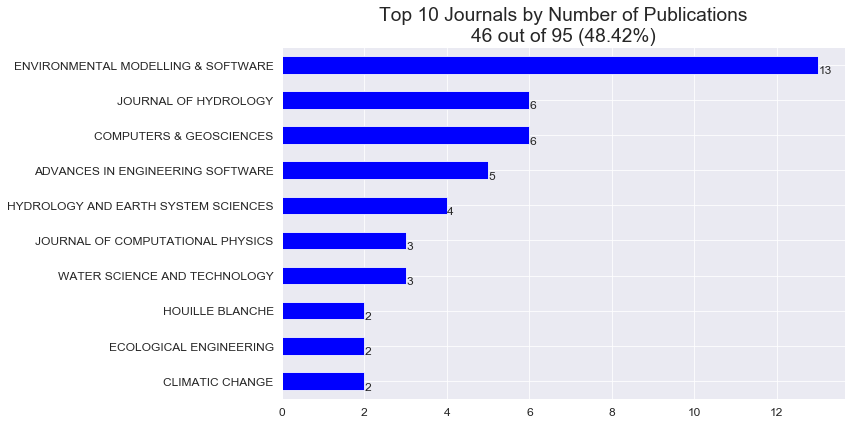

In [6]:
wos_plot.plot_pubs_per_journal(relevant_pubs, annotate=True)

In [7]:
journals_of_interest_software = list(map(str.upper, ['Environmental Modelling & Software', 'Journal of Hydrology', 
                                                     'Computers & Geosciences', 'Advances in Engineering Software', 
                                                     'Hydrology and Earth System Sciences', 
                                                     'Journal of Computational Physics', 'Water Science and Technology', 
                                                     'Houille Blanche', 'Ecological Engineering', 'Climate Change']))

pubs_for_journals_software = wosis.find_pubs_by_journal(relevant_pubs, journals_of_interest_software)

In [9]:
# Get citations for each paper
paper_citations_per_journal_software = {}
for journal in pubs_for_journals_software:
    fn = '{}/collection_software_10_{}_2019-03-15'.format(TMP_DIR, journal)
    paper_citations_per_journal_software[journal] = wosis.get_num_citations(pubs_for_journals_software[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

Authenticated (SID: 7C6lca4ati1pxKQxqvu)



Authenticated (SID: 6DMOpnQ1RxD2FHncTbx)



Authenticated (SID: 8AfHL38aSNpypuiymuu)


In [27]:
# Papers cited by papers identified with version control keywords
author_citation_network = software_rc.networkCitation(nodeType='full')
acn = author_citation_network
# mk.dropNodesByDegree(acn, 1)
print(mk.graphStats(acn))

Nodes: 0
Edges: 0
Isolates: 0
Self loops: 0
Density: 0
Transitivity: 0


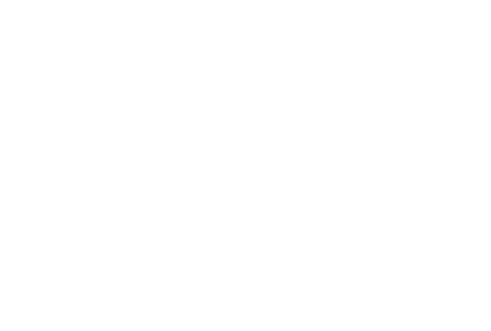

In [26]:
nx.draw_spring(author_citation_network, node_color=[partition[n] for n in acn.nodes()], 
               cmap=plt.cm.Set2, with_labels=True, font_size=10, node_size=30, alpha=0.5)

In [75]:
%matplotlib notebook

In [86]:
coAuths = software_rc.networkCoAuthor()  # RC.networkCoAuthor()
mk.dropNodesByDegree(coAuths, 2)
mk.dropEdges(coAuths, 2, dropSelfLoops=True)
mk.dropNodesByCount(coAuths, 2)

print(mk.graphStats(coAuths))

Nodes: 912
Edges: 27
Isolates: 878
Self loops: 0
Density: 6.49951E-05
Transitivity: 0.857143


In [89]:
?nx.draw_networkx

<IPython.core.display.Javascript object>


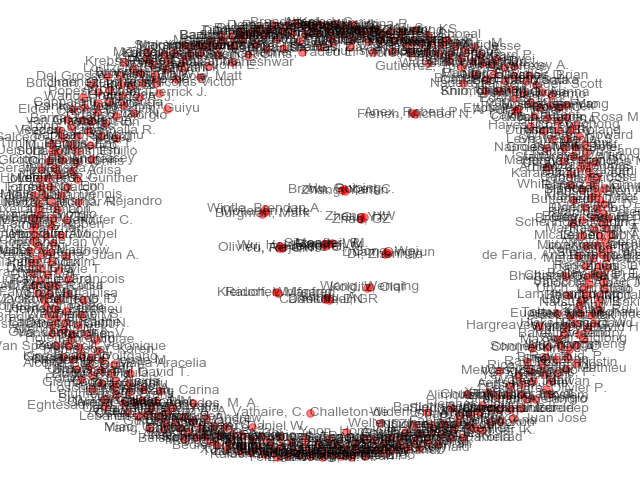

In [77]:
nx.draw_spring(coAuths, with_labels=True, font_size=10, node_size=30, alpha=0.5)